In [1]:
# Importing required libraries
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Function to load ROUGE-L values from a JSON file
def load_rouge_l_values(json_file):
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return [entry['score_rouge_l'] for entry in data]

In [3]:
# Load ROUGE-L values from both JSON files
rouge_l_values_file1 = load_rouge_l_values('/home/guangwei/LLM-COPYRIGHT/copyright_newVersion/test_division/extra.non_infringement.json')
rouge_l_values_file2 = load_rouge_l_values('/home/guangwei/LLM-COPYRIGHT/copyright_newVersion/test_division/extra.infringement.json')

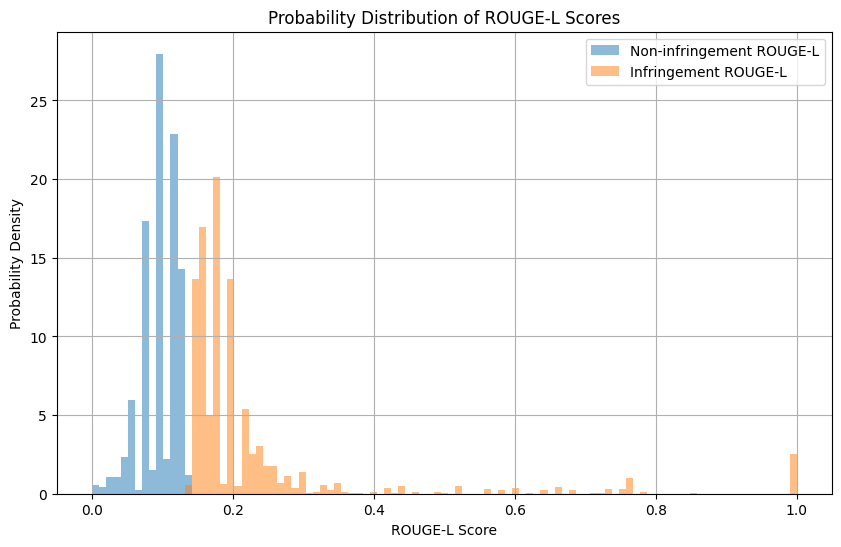

In [4]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Define the bins (0 to 1 range, 20 bins for example)
bins = np.linspace(0, 1, 100)

# Plot histogram for ROUGE-L values as probabilities
plt.hist(rouge_l_values_file1, bins=bins, alpha=0.5, label='Non-infringement ROUGE-L', density=True)
plt.hist(rouge_l_values_file2, bins=bins, alpha=0.5, label='Infringement ROUGE-L', density=True)

# Adding labels and title
plt.xlabel('ROUGE-L Score')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of ROUGE-L Scores')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()